# Introduction to Artificial Neural Networks (ANN)

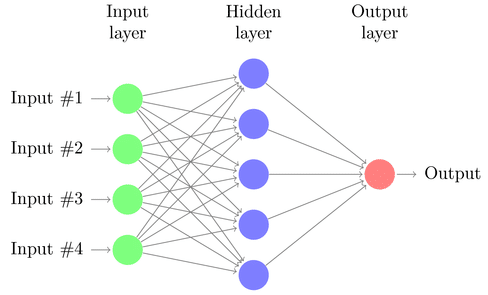

### A single neuron

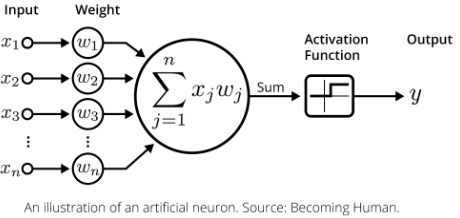

for each node the weighted sum is calculated and a bias(b) is added at the end

Sum = x1(w1) + x2(w2) + x3(w3) . . . xn(wn) + b 

The sum is passed to an activation function which returns the output value y

y=ActivationFunction(Sum)

## Popular Activation Functions

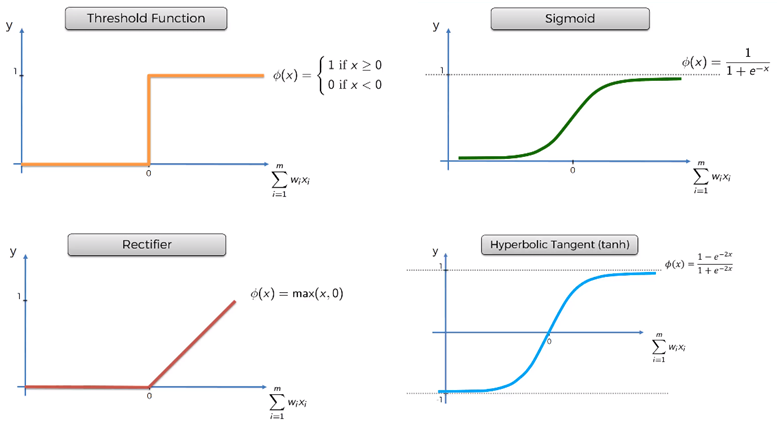

## Using ANN on CarPricesData

In [1]:
# Reading the cleaned numeric car prices data
import pandas as pd
import numpy as np

# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)

CarPricesDataNumeric=pd.read_pickle('CarPricesDataNumeric.pkl')
CarPricesDataNumeric.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,13500,23.0,46986,90,1,0,2000.0,3,1165.0,0,1,0
1,13750,23.0,72937,90,1,0,2000.0,3,1165.0,0,1,0
2,13950,24.0,41711,90,1,0,2000.0,3,1165.0,0,1,0
3,14950,26.0,48000,90,0,0,2000.0,3,1165.0,0,1,0
4,13750,30.0,38500,90,0,0,2000.0,3,1170.0,0,1,0


## Splitting the Data into Training and Testing

In [2]:
# After Standardization of data
# Separate Target Variable and Predictor Variables
TargetVariable=['Price']
Predictors=['Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors',
       'Weight', 'FuelType_CNG', 'FuelType_Diesel', 'FuelType_Petrol']

X=CarPricesDataNumeric[Predictors].values
y=CarPricesDataNumeric[TargetVariable].values


### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)


# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(999, 11)
(999, 1)
(429, 11)
(429, 1)


In [4]:
# Standardized predictors
X[0:3]

array([[-1.79400224, -0.58190964, -0.76628391,  0.69377792, -0.24361277,
         2.34607519, -1.08412485,  2.10364977, -0.10976426,  2.92982809,
        -2.75724675],
       [-1.79400224,  0.11238127, -0.76628391,  0.69377792, -0.24361277,
         2.34607519, -1.08412485,  2.10364977, -0.10976426,  2.92982809,
        -2.75724675],
       [-1.73978236, -0.72303656, -0.76628391,  0.69377792, -0.24361277,
         2.34607519, -1.08412485,  2.10364977, -0.10976426,  2.92982809,
        -2.75724675]])

In [5]:
# Inverse transform will take the data back to original form
PredictorScalerFit.inverse_transform(X)[0:3]

array([[   23., 46986.,    90.,     1.,     0.,  2000.,     3.,  1165.,
            0.,     1.,     0.],
       [   23., 72937.,    90.,     1.,     0.,  2000.,     3.,  1165.,
            0.,     1.,     0.],
       [   24., 41711.,    90.,     1.,     0.,  2000.,     3.,  1165.,
            0.,     1.,     0.]])

In [1]:
# Installing required libraries
#!pip install tensorflow
#!pip install keras

## Regression using Deep Learning- Artificial Neural Networks(ANN)

In [8]:
from keras.models import Sequential
from keras.layers import Dense

In [9]:
# create ANN model
model = Sequential()

# Defining the first layer of the model
model.add(Dense(units=5, input_dim=11, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))


# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [12]:
# Fitting the ANN to the Training set
#1000/20 --- forward/backward
model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
999/999 [==============================] - 0s 93us/step - loss: 0.0988
Epoch 2/50
999/999 [==============================] - 0s 52us/step - loss: 0.0961
Epoch 3/50
999/999 [==============================] - 0s 78us/step - loss: 0.0938
Epoch 4/50
999/999 [==============================] - 0s 42us/step - loss: 0.0927
Epoch 5/50
999/999 [==============================] - 0s 82us/step - loss: 0.0923
Epoch 6/50
999/999 [==============================] - 0s 61us/step - loss: 0.0920
Epoch 7/50
999/999 [==============================] - 0s 65us/step - loss: 0.0919
Epoch 8/50
999/999 [==============================] - 0s 78us/step - loss: 0.0917
Epoch 9/50
999/999 [==============================] - 0s 55us/step - loss: 0.0916
Epoch 10/50
999/999 [==============================] - 0s 74us/step - loss: 0.0916
Epoch 11/50
999/999 [==============================] - 0s 74us/step - loss: 0.0915
Epoch 12/50
999/999 [==============================] - 0s 64us/step - loss: 0.0915
Epoch 13/50
9

## Finding best set of parameters using manual grid search

In [10]:
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=10, input_dim=11, kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=5, input_dim=20, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = 10, verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)

In [11]:
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 74.10423944119796
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 82.51218687674773
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 81.67499042687164
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 80.21689155411983
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 80.80959322216898
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 76.16741468539524
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 76.51623607219206
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 78.02351524244798
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 76.44011092984358
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 72.07143031114698
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 73.34282814299367
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 74.70193348596707
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 71.90130028306409
14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 76.2260026889484
15 Parameters: batch_

### Plotting the parameter search results

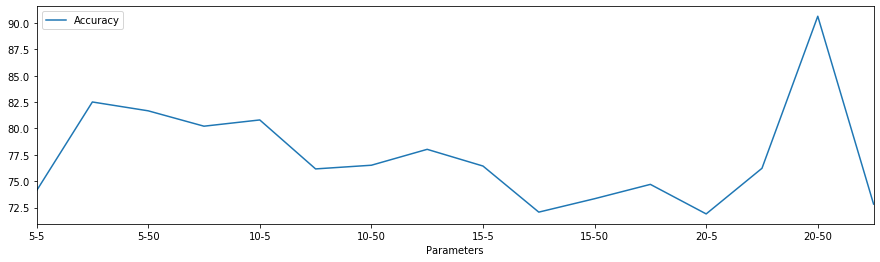

In [12]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

### Generating the model using best hyperparameters

In [13]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 5, verbose=0)

### Generating the predictions on Testing Data

In [14]:
# Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Price']=y_test_orig
TestingData['PredictedPrice']=Predictions
TestingData.head()

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol,Price,PredictedPrice
0,20.0,35000.0,97.0,1.0,0.0,1400.0,5.0,1110.0,0.0,0.0,1.0,16500.0,13282.576172
1,76.0,89520.0,110.0,1.0,0.0,1600.0,3.0,1050.0,0.0,0.0,1.0,8950.0,7779.915039
2,56.0,66777.0,110.0,0.0,0.0,1600.0,5.0,1090.0,0.0,0.0,1.0,11950.0,11094.416016
3,39.0,24723.0,110.0,1.0,1.0,1600.0,4.0,1060.0,0.0,0.0,1.0,12695.0,12642.815430
4,68.0,35000.0,110.0,1.0,0.0,1600.0,3.0,1050.0,0.0,0.0,1.0,8900.0,9435.796875


In [15]:
# Comparing a sample row from original data to confirm if the reverse transform has happend correctly
CarPricesDataNumeric[CarPricesDataNumeric['KM']==89520]

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
1197,8950,76.0,89520,110,1,0,1600.0,3,1050.0,0,0,1


### Calculating the Accuracy on Testing Data

In [16]:
APE=100* (abs(TestingData['Price']-TestingData['PredictedPrice'])/TestingData['Price'])
TestingData['APE']=APE
print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: 89.78448778148149


,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol,Price,PredictedPrice,APE
0,20.0,35000.0,97.0,1.0,0.0,1400.0,5.0,1110.0,0.0,0.0,1.0,16500.0,13282.576172,19.499538
1,76.0,89520.0,110.0,1.0,0.0,1600.0,3.0,1050.0,0.0,0.0,1.0,8950.0,7779.915039,13.073575
2,56.0,66777.0,110.0,0.0,0.0,1600.0,5.0,1090.0,0.0,0.0,1.0,11950.0,11094.416016,7.159699
3,39.0,24723.0,110.0,1.0,1.0,1600.0,4.0,1060.0,0.0,0.0,1.0,12695.0,12642.815430,0.411064
4,68.0,35000.0,110.0,1.0,0.0,1600.0,3.0,1050.0,0.0,0.0,1.0,8900.0,9435.796875,6.020190


### Analyzing the errors

In [17]:
# Printing top 10 errors made by model
TestingData.sort_values(by='APE', ascending=False).head(10)

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol,Price,PredictedPrice,APE
295,44.0,131273.0,69.0,1.0,0.0,1800.0,5.0,1110.0,0.0,1.0,0.0,4750.0,10092.026367,112.463713
242,74.0,203254.0,72.0,1.0,0.0,2000.0,3.0,1135.0,0.0,1.0,0.0,4400.0,6659.146973,51.344249
225,8.0,6000.0,90.0,1.0,0.0,2000.0,5.0,1280.0,0.0,1.0,0.0,24990.0,13282.576172,46.848435
338,8.0,13253.0,116.0,1.0,0.0,2000.0,5.0,1320.0,0.0,1.0,0.0,24950.0,13282.576172,46.763222
234,6.0,3000.0,110.0,0.0,0.0,1600.0,5.0,1130.0,0.0,0.0,1.0,22500.0,13282.576172,40.966328
121,17.0,57313.0,110.0,1.0,0.0,2000.0,5.0,1275.0,0.0,1.0,0.0,22250.0,13282.576172,40.303028
143,58.0,69022.0,86.0,1.0,0.0,1300.0,5.0,1035.0,0.0,0.0,1.0,6950.0,9739.548828,40.137393
357,8.0,9788.0,110.0,1.0,0.0,1600.0,5.0,1130.0,0.0,0.0,1.0,21950.0,13282.576172,39.487125
51,31.0,64982.0,192.0,1.0,0.0,1800.0,5.0,1195.0,0.0,0.0,1.0,21950.0,13282.576172,39.487125
279,8.0,5000.0,110.0,1.0,0.0,1600.0,5.0,1130.0,0.0,0.0,1.0,21950.0,13282.576172,39.487125


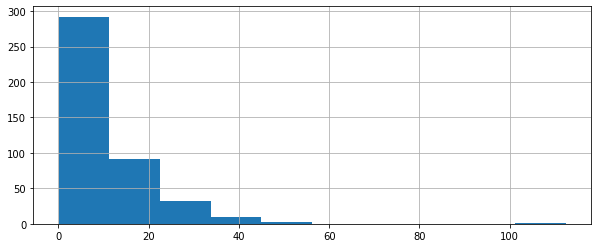

In [18]:
# Looking at the distribution is errors
%matplotlib inline
TestingData['APE'].hist(figsize=(10,4))

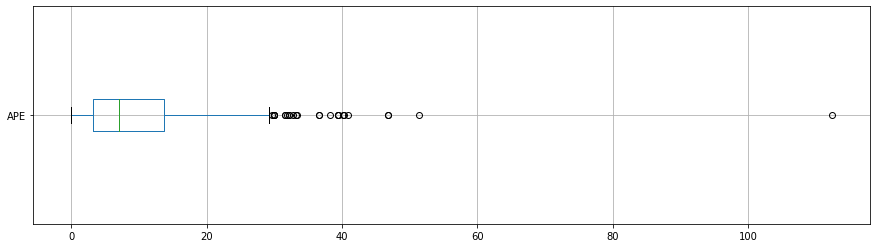

In [19]:
TestingData.boxplot(column='APE', figsize=(15,4), vert=False)

## Sklearn GridSearchCV 

In [20]:
# Function to generate Deep ANN model 
def make_regression_ann(Optimizer_trial):
    from keras.models import Sequential
    from keras.layers import Dense
    
    model = Sequential()
    model.add(Dense(units=10, input_dim=11, kernel_initializer='normal', activation=actFunctionTrial))
    model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=Optimizer_trial)
    return model

In [21]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor


Parameter_Trials={'batch_size':[10,20,30],
                      'epochs':[10,20],
                    'Optimizer_trial':['adam', 'rmsprop']
                 }


RegModel=KerasRegressor(make_regression_ann, verbose=0)

In [22]:
from sklearn.metrics import make_scorer

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

In [23]:
# Creating the Grid search space
# See different scoring methods by using sklearn.metrics.SCORERS.keys()
grid_search=GridSearchCV(estimator=RegModel, param_grid=Parameter_Trials, scoring=custom_Scoring, cv=5)

In [24]:
# Measuring how much time it took to find the best params
import time
StartTime=time.time()

# Running Grid Search for different paramenters
grid_search.fit(X,y, verbose=1)

EndTime=time.time()
print("########## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes')

Epoch 1/10
799/799 [==============================] - 0s 307us/step - loss: 1.0564
Epoch 2/10
799/799 [==============================] - 0s 148us/step - loss: 0.9049
Epoch 3/10
799/799 [==============================] - 0s 145us/step - loss: 0.7950
Epoch 4/10
799/799 [==============================] - 0s 142us/step - loss: 0.7392
Epoch 5/10
799/799 [==============================] - 0s 141us/step - loss: 0.6961
Epoch 6/10
799/799 [==============================] - 0s 142us/step - loss: 0.6598
Epoch 7/10
799/799 [==============================] - 0s 144us/step - loss: 0.6256
Epoch 8/10
799/799 [==============================] - 0s 143us/step - loss: 0.5955
Epoch 9/10
799/799 [==============================] - 0s 140us/step - loss: 0.5682
Epoch 10/10
799/799 [==============================] - 0s 143us/step - loss: 0.5421
###################################################################### Accuracy: 91.6940287842549
Epoch 1/10
799/799 [==============================] - 0s 423us/step - l

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Epoch 1/10
999/999 [==============================] - 0s 230us/step - loss: 1.0234
Epoch 2/10
999/999 [==============================] - 0s 82us/step - loss: 0.9320
Epoch 3/10
999/999 [==============================] - 0s 81us/step - loss: 0.5872
Epoch 4/10
999/999 [==============================] - 0s 76us/step - loss: 0.2449
Epoch 5/10
999/999 [==============================] - 0s 77us/step - loss: 0.1492
Epoch 6/10
999/999 [==============================] - 0s 78us/step - loss: 0.1348
Epoch 7/10
999/999 [==============================] - 0s 82us/step - loss: 0.1292
Epoch 8/10
999/999 [==============================] - 0s 79us/step - loss: 0.1241
Epoch 9/10
999/999 [==============================] - 0s 75us/step - loss: 0.1199
Epoch 10/10
999/999 [==============================] - 0s 77us/step - loss: 0.1155
########## Total Time Taken:  2 Minutes


In [25]:
grid_search.best_params_

{'Optimizer_trial': 'adam', 'batch_size': 20, 'epochs': 10}

In [26]:
grid_search.best_score_

104.07555883346964

In [3]:
from sklearn import metrics
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])